In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('Car details v3.csv')

In [3]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [5]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [6]:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [7]:
data=df.copy(deep=True)

In [8]:
# plt.figure(figsize=(8,4))
# sns.countplot('fuel',data=df)

In [9]:
# plt.figure(figsize=(8,4))
# sns.countplot('fuel',data=df)

In [10]:
# plt.savefig('fuelwise.png', dpi=300, bbox_inches='tight')

In [11]:
pd

<module 'pandas' from 'C:\\Users\\Aashish\\anaconda3\\envs\\Car_price\\lib\\site-packages\\pandas\\__init__.py'>

In [12]:
# plt.figure(figsize=(8,4))
# sns.countplot('seats',data=df)
# plt.savefig('seats.jpg', dpi=300, bbox_inches='tight')

In [13]:
# plt.figure(figsize=(8,4))
# sns.countplot('owner',data=df)
# plt.savefig('owner.jpg', dpi=300, bbox_inches='tight')

In [14]:
# plt.figure(figsize=(12,10))
# plt.hist('km_driven',data=df,bins=300,color='grey')
# plt.xlim([0, 300000]);
# plt.xlabel('Km_driven')
# plt.ylabel('No. of count')
# plt.savefig('Kms_Driven.jpg', dpi=300, bbox_inches='tight')

In [15]:
df['transmission'].value_counts()

Manual       7078
Automatic    1050
Name: transmission, dtype: int64

In [16]:
df['fuel'].value_counts()

Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: fuel, dtype: int64

In [17]:
df['owner'].value_counts()

First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: owner, dtype: int64

In [18]:
df['seller_type'].value_counts()

Individual          6766
Dealer              1126
Trustmark Dealer     236
Name: seller_type, dtype: int64

In [19]:
from sklearn.preprocessing import OrdinalEncoder

In [20]:
oenc=OrdinalEncoder()

In [21]:
df['fuel']=oenc.fit_transform(df[['fuel']])
df['seller_type']=oenc.fit_transform(df[['seller_type']])
df['transmission']=oenc.fit_transform(df[['transmission']])
df['owner']=oenc.fit_transform(df[['owner']])

In [22]:
df['how_old']=2022-df['year']

In [23]:
df.drop(['year'],axis=1,inplace=True)
df.drop(['name'],axis=1,inplace=True)

In [24]:
df['mileage']= df['mileage'].str.extract('(\d+.\d+)').astype('float')
df['engine']=df['engine'].str.extract('(^\d*)')
df['max_power']=df['max_power'].str.extract('(^\d*)')

In [25]:
df['mileage'].fillna(df.groupby(['fuel'])['mileage'].transform('mean'),inplace=True)
df['seats'].fillna(df['seats'].mode()[0],inplace=True)

In [26]:
df.dropna(inplace=True)

In [27]:
df.isnull().sum()

selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
how_old          0
dtype: int64

In [28]:
df['torque']= df['torque'].str.extract('(^\d*)')
df['torque']= df['torque'].astype(int)
#if it's in kgm, change it to N.m by multiplying by g= 9.8
df['torque'] = df['torque'].apply(lambda x: 9.8*x if x <= 50 else x)

In [29]:
# df.corr().selling_price.sort_values().to_frame()

In [30]:
# plt.figure(figsize=(10,10))
# sns.heatmap(df.corr(),annot=True)
# plt.savefig('Correlation.jpg', dpi=300, bbox_inches='tight')

In [31]:
df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,how_old
0,450000,145500,1.0,1.0,1.0,0.0,23.40,1248,74,190.0,5.0,8
1,370000,120000,1.0,1.0,1.0,2.0,21.14,1498,103,250.0,5.0,8
2,158000,140000,3.0,1.0,1.0,4.0,17.70,1497,78,117.6,5.0,16
3,225000,127000,1.0,1.0,1.0,0.0,23.00,1396,90,215.6,5.0,12
4,130000,120000,3.0,1.0,1.0,0.0,16.10,1298,88,107.8,5.0,15


C:\Users\Aashish\anaconda3\envs\Car_price\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='how_old', ylabel='Density'>

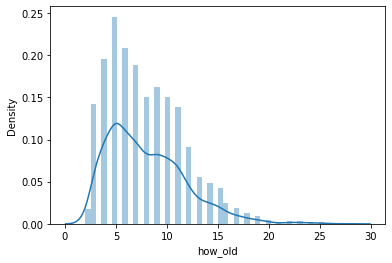

In [32]:
sns.distplot(df['how_old'])

In [33]:
X=df.drop(['selling_price'],axis=True)
y=df[['selling_price']]

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [36]:
from sklearn.ensemble import RandomForestRegressor

In [37]:
rf=RandomForestRegressor()

In [38]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
print(n_estimators)

[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]


In [39]:
from sklearn.model_selection import RandomizedSearchCV

In [40]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
bootstrap=[True,False]


In [41]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10], 'bootstrap': [True, False]}


In [42]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 20, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [43]:
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


C:\Users\Aashish\anaconda3\envs\Car_price\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [44]:
rf_random.best_params_

{'n_estimators': 1400,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 20,
 'bootstrap': True}

In [45]:
rf_random.best_score_

0.955975756604034

In [46]:
pwd

'c:\\Streamlit'

In [47]:
prediction=rf_random.predict(X_test)

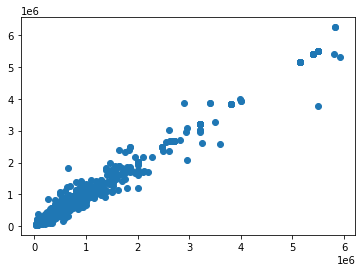

In [48]:
plt.scatter(y_test,prediction)
plt.savefig('Finaloutput.jpg', dpi=300, bbox_inches='tight')

In [55]:
data={'feature_names':X_train.columns,'feature_importance':rf.coef_}
fi_df = pd.DataFrame(data)
# Sort the DataFrame in order decreasing feature importance
fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
plt.figure(figsize=(16,12))
sns.barplot(x=fi_df['feature_importance']*100, y=fi_df['feature_names']);
plt.title( 'Random Forest Feature Importance')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names');

AttributeError: 'RandomForestRegressor' object has no attribute 'coef_'

In [ ]:
# import pickle

In [ ]:
# pickle_out=open('rf_random.pkl', 'wb')

In [ ]:
# pickle.dump(rf_random,pickle_out)
# pickle_out.close()

In [ ]:
# (df['fuel']==2).sum()

In [ ]:
# (df['fuel']==0).sum()

In [ ]:
# df['seller_type'].unique()